## 신경망

### 퍼셉트론에서 신경망으로

#### 신경망의 예

- 입력층, 은닉층, 출력층

- 은닉층의 뉴런은 (입력층이나 출력층과 달리) 사람 눈에는 보이지 않음


#### 퍼셉트론 복습

- x1과 x2라는 두 신호를 입력받아 y를 출력

- 편향 : 뉴런이 얼마나 쉽게 활성화되느냐를 제어

- 가중치 : 각 신호의 영향력을 제어하는 매개변수

- 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달

- 다음 뉴런에서는 이 신호 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

#### 활성화 함수의 등장

활성화 함수(activation function)
- 입력 신호의 총합을 출력 신호로 변환하는 함수

- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할

- 일반적으로 단순 퍼셉트론은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리킴

- 다층 퍼셉트론은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)를 가리킴

### 활성화 함수

계단 함수(step function)
- 임계값을 경계로 출력이 바뀜

- 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다
- -  활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 사용

#### 시그모이드 함수

시그모이드 함수(sigmoid function)
- 입력값을 0과 1 사이의 실수로 변환하는 S자형(sigmoid) 곡선 형태의 비선형 활성화 함수

- 신경망에서는 활성화 함수로 시그모이드 함수를 사용하여 신호를 변환

- 그 변환된 신호를 다음 뉴런에 전달

- 퍼셉트론과 신경망의 주된 차이는 활성화 함수뿐

- 그 외에 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 퍼셉트론과 같다

#### 계단 함수 구현하기

- 계단함수 > 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [19]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다

- step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없음

In [20]:
# 넘파이 배열도 지원하도록 수정
def step_function(x):
    y = x > 0
    return y.astype(int)

- 아래의 예에서는 x라는 넘파이 배열을 준비하고 그 넘파이 배열에 부등호 연산을 수행

In [21]:
# 파이썬 인터프리터의 예
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [22]:
y = x > 0
y

array([False,  True,  True])

- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성

- 배열 x의 원소 각각이 0보다 크면 True로, 0 이하면 False로 변환한 새로운 배열 y가 생성됨

- 이 y는 bool 배열

- 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수
- - 배열 y의 원소를 bool에서 int형으로 바꾸기

In [23]:
y = y.astype(int)
y

array([0, 1, 1])

- 넘파이 배열의 자료형을 변환할 때는 astype() 메서드를 이용

- 원하는 자료형을 인수로 지정
- bool을 int로 변환하면 True는 1로, False는 0으로 변환

#### 계단 함수의 그래프

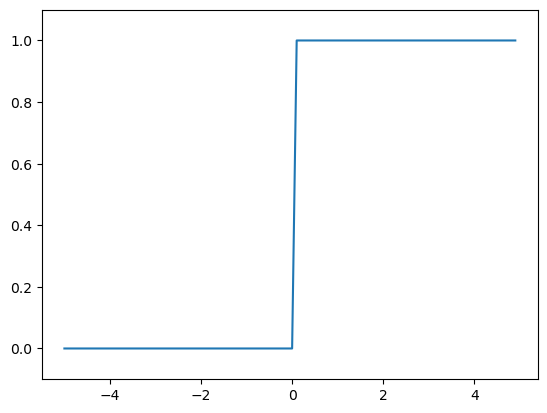

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=int)   

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위를 -0.1에서 1.1로 지정
plt.show()

- np.arrange(-5.0, 5.0, 0.1)은 -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성

- step_function()은 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수 실행해, 그 결과를 다시 배열로 만들어 돌려줌

- 그래프에서 보듯 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)으로 바뀜

#### 시그모이드 함수 구현하기

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- 여기서 np.exp(-x)는 exo(-x) 수식에 해당

- 인수 x가 넘파이 배열이어도 올바른 결과가 나옴

In [26]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 이 함수가 넘파이 배열도 잘 처리해줄 수 있는 비밀은 넘파이의 브로드캐스트에 있음

- 브로드캐스트 > 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [27]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [28]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

- 결과적으로 스칼라값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘파이 배열로 출력됨

- 앞에서 구현한 sigmoid 함수에서도 np.exp(-x)가 넘파이 배열을 반환하기 때문에 1 / (1 + exp(-x))도 넘파이 배열의 각 원소에 연산을 수행한 결과를 내어줌

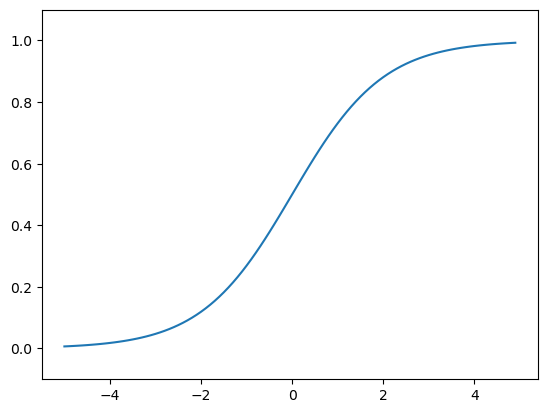

In [29]:
# 시그모이드 함수 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위를 -0.1에서 1.1로 지정
plt.show()

#### 시그모이드 함수와 계단 함수 비교

1. 매끄러움의 차이
- 시그모이드 함수는 부드러운 곡선
- - 입력에 따라 출력이 연속적으로 변화함
- 계단 함수는 0을 경계로 출력이 갑자기 바뀜
- 시그모이드 함수의 매끈함이 신경망 학습에서 중요한 역할을 함

2. 
- 계단 함수는 0과 1 중 하나의 값만 돌려줌

- 시그모이드 함수는 실수를 돌려줌
- 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흐름
- 신경망에서는 연속적인 실수가 흐름

3. 공통점
- 큰 관점에서 보면 둘은 같은 모양을 하고 있다

- 둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는)구조
- 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 중요하지 않으면 작은 값을 출력
- 입력이 아무리 작거나 커도 출력은 0과 1 사이

#### 비선형 함수

- 함수 : 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'

- 선형 함수 : 이 변환기에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수
- - f(x) = ax + b
- - 이때 a와 b는 상수
- - 선형 함수는 곧은 1개의 직선이 된다

- 비선형 함수 : '산형이 아닌' 함수
- - 직선 1개로는 그릴 수 없는 함수

- 계단 함수와 시그모이드 함수의 공톤점으로, 둘 모두 비선형 함수이다

- 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 구분됨

- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함 > 선형 함수를 사용하면 안됨

- 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어짐

- 선형함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있음

- 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없음

- 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 함

#### ReLU 함수

ReLU(Rectified Liner Unit) 함수
- 입력이 0이 넘으면 그 입력을 그대로 출력

- 0 이하이면 0을 출력

In [30]:
def relu(x):
    return np.maximum(0, x)

- 넘파이의 maximum 함수를 사용

- maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

### 다차원 배열의 계산

#### 다차원 배열

- 다차원 배열도 그 기본은 '숫자의 집합'

- 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나 N차원으로 나열하는 것 등

In [31]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [32]:
np.ndim(A) # 배열 A의 차원 수

1

In [33]:
A.shape # 배열 A의 형상

(4,)

In [34]:
A.shape[0] # 배열 A의 첫 번째 차원의 크기

4

- 배열의 차원 수는 np.ndim() 함수로 확인

- 배열의 형상은 인스턴스 변수인 shape으로 알 수 있음

- A는 1차원 배열이고 원소 4개로 구성!

- A.shape은 튜플을 반환함

- 이는 1차원 배열이라도 다차원 배열일 때와 통일한 형태로 결과를 반환하기 위함

In [35]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [36]:
np.ndim(B) # 배열 B의 차원 수

2

In [37]:
B.shape # 배열 B의 형상

(3, 2)

- 3x2 배열인 B

- 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개
- 처음 차원은 0번째 차원, 다음 차원은 1번째 차원에 대응(파이썬 인덱스는 0부터 시작)
- 2차원 배열은 특히 행렬(matrix)이라고 부른다
- 배열의 가로 방향을 행(row)
- 배열의 세로 방향을 열(column)이라고 부름

#### 행렬의 곱

- 행렬 곱은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산

- 긜고 그 계산 결과가 새로운 다차원 배열의 원소가 된다

In [38]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [39]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [40]:
np.dot(A, B) # 행렬 A와 B의 곱

array([[19, 22],
       [43, 50]])

- A와 B는 2x2 행렬이며, 이 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산

- np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산
- +와 * 등의 일반적인 연산과 달리 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 다름

In [41]:
# 형상이 다른 행렬의 곱
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [42]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [43]:
np.dot(A, B) # 행렬 A와 B의 곱

array([[22, 28],
       [49, 64]])

- 행렬의 형상(shape)에 주의해야 함

- 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 함


In [44]:
# 2*3 행렬과 2*2 행렬의 곱 > 오류
C = np.array([[1, 2], [3, 4]])
np.dot(A, C) # 행렬 A와 C의 곱

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

- 이 오류는 행렬 A의 1번째 차원(dim 1)과 행렬 C의 0번째 차원(dim 0)의 원소 수가 다르다고 말

- 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함

In [45]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [46]:
B = np.array([7, 8])
B.shape

(2,)

In [47]:
np.dot(A, B) # 행렬 A와 B의 곱

array([23, 53, 83])

#### 신경망에서의 행렬 곱

In [48]:
x = np.array([1, 2])
x.shape

(2,)

In [49]:
w = np.array([[1, 3, 5], [2, 4, 6]])
print(w)

[[1 3 5]
 [2 4 6]]


In [50]:
w.shape

(2, 3)

In [51]:
Y = np.dot(x, w)
print(Y)

[ 5 11 17]


- 다차원 배열의 스칼라곱을 구해주는 np.dot 함수를 사용하려면 이처럼 단번에 결과 Y 계산 가능

- Y의 원소가 100개든, 1000개든 한 번의 연산으로 계산 가능
- np.dot을 사용하지 않으면 Y의 원소를 하나씩 따져보거나 for문을 사용
- 행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요!!!

#### 3층 신경망 구현하기

- 3층 신경망에서 수행되는, 입력부터 출력까지의 처리(순방향)를 구현

- 넘파이의 다차원 배열을 사용!

- 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성

##### 각 층의 신호 전달 구현하기

- 입력층에서 '1층의 첫 번째 뉴런'으로 가는 신호

- a1 = w11x1 + w12x2 + b1

- 행렬의 곱을 이용하면 1층의 '가중치 부분'을 간소화 가능
- A = XW + B
- A = (a1, a2, a3) , X = (x1, x2) , B = (b1, b2, b3), W = (w11, w12, w21, w22, w31, w32)

- 넘파이의 다차원 배열을 사용해서 구현

In [52]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape) 
print(B1.shape)

(2, 3)
(2,)
(3,)


In [53]:
A1 = np.dot(X, W1) + B1

- W1은 2*3 행렬, X는 원소가 2개인 1차원 배열이다

- W1과 X의 대응하는 차원의 원소 수가 일치

In [54]:
# 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기
# 활성화 함수로 시그모이드 함수를 사용!
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


- sigmoid() 함수는 앞에서 정의한 함수

- 이 함수는 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열을 반환

- 1층에서 2층으로 가는 과정 구현하기

In [55]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [56]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

- 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 조금 전의 구현과 똑같음

- 이처럼 넘파이 배열을 사용하면서 층 사이의 신호 전달을 쉽게 구현 가능


- 2층에서 출력층으로의 신호 전달 구현하기!

- 출력층의 구현도 그동안의 구현과 거의 동일
- 하지만 활성화 함수만 지금까지의 은닉층과 다름

In [57]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

- 여기에서는 항등 함수인 identity_function()을 정의하고, 이를 출력층의 활성화 함수로 이용

- 항등 함수는 입력을 그대로 출력하는 함수

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다

- 예를 들어 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용

#### 구현 정리

In [58]:
# 가중치만 W1같이 대문자로 쓰고 그 외 편향과 중간 결과 등은 모두 소문자료 표현
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- init_network()와 foward()라는 함수를 정의

- init_network() 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
- - 이 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치와 편향)를 저장

- foward() 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현
- - 함수 이름이 foward인 이유는 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 표현

#### 출력층 설계하기

- 신경망은 분류와 회귀 모두에 이용 가능

- 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다
- 일반적으로는 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용
- - 기계학습 문제는 분류(classification)와 회귀(regression)로 나뉜다
- - 분류는 데이터가 어느 클래스에 속하느냐는 문제
- - 회귀는 입력 데이터에서 연속적인 수치를 예측하는 문제

##### 항등 함수와 소프트맥스 함수 구현하기

- 항등 함수(identity function)는 입력을 그대로 출력

- 입력과 출력이 하상 같다는 뜻의 항등임
- 그래서 출력 층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 됨
- 항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 그림

- 소프트맥스 함수(softmax function)는 분류에서 사용

- exp(x)는 e^x을 뜻하는 지수 함수(exponetial function)이다; e는 자연상수
- n은 출력층 뉴런 수, yk는 그중 k번째 출력임을 뜻
- 소프트맥스 함수의 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성

- 소프트 맥스의 출력은 모든 입력 신호로부터 화살표를 받음

- 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문!

- 소프트맥스 함수 구현하기

In [59]:
a = np.array([0.3, 2.9, 4.0])

In [60]:
exp_a = np.exp(a) # 지수 함수 계산
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [61]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합 계산
print(sum_exp_a)

74.1221542101633


In [62]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


- 이 구현은 소프트맥스 함수를 그대로 파이썬으로 표현한 것

In [63]:
# 논리 흐름을 하나의 함수로 정리
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 소프트맥스 함수 구현 시 주의점

- 위에서 구현한 softmax() 함수의 코드는 컴퓨터로 계산할 때 결함이 있음
- - 오버플로 문제!

- 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 아주 큰 값을 출력함
- 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다

- 오버플로(overflow)

- 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없다는 문제

- 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다

- 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용

In [64]:
# 예
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 오버플로 문제 발생!

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_31470/1351934149.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 오버플로 문제 발생!
/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_31470/1351934149.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # 오버플로 문제 발생!


array([nan, nan, nan])

In [65]:
c = np.max(a) # 입력값 중 최댓값을 구한다
print(c)

1010


In [66]:
a - c

array([  0, -10, -20])

In [67]:
np.exp(a - c) / np.sum(np.exp(a - c)) # 오버플로 문제 해결!

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- 아무런 조치 없이 그냥 계산하면 nan(not a number)이 출력

- 하지만 입력 신호 중 최댓값을 빼주면 올바르게 계산 가능

In [68]:
# 소프트맥스 함수 다시 구현
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 소프트맥스 함수의 특징

In [69]:
# softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산된다
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [70]:
np.sum(y) # 소프트맥스 함수의 출력의 총합은 1이 된다

1.0

- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수

- 소프트맥스 함수 출력의 총합은 1
- 이러한 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석 가능

- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음

- 이는 지수함수 y = exp(x)가 단조 증가 함수이기 때문

- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식함

- 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음
- 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다


- 기계학습의 문제 풀이는 학습과 추론(inference)의 두 단계를 거쳐 이루어짐

- 학습 단계에서 모델을 학습하고, 추론 단계에세 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)를 수행
- 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적
- 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용

#### 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함

- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적!



### 손글씨 숫자 인식

- 신경망의 순전파(foward propagation) -> 추론 과정

#### MNIST 데이터셋

- 손글씨 숫자 이미지 집합

- MNIST는 기계학습 분야에서 유명한 데이터셋으로
- 이미지 인식이나 기계학습 논문들을 읽다 보면 실험용 데이터로 자주 등장

- 0부터 9까지늬 숫자 이미지로 구성

- 이미지가 60000장, 시험 이미지가 10000장 준비됨
- 일반적으로 훈련 이미지들을 사용하여 모델을 학습하고, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지를 평가

In [71]:
import sys
import os

# 부모 디렉터리 접근 가능하도록 설정
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

# MNIST 데이터 로드
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 데이터 형상 출력
print(x_train.shape)   # (60000, 784)
print(t_train.shape)   # (60000,)
print(x_test.shape)    # (10000, 784)
print(t_test.shape)    # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- 가장 먼저 부모 디렉터리의 파일을 가져올 수 있도록 설정하고 load_mnist 함수 임포트

- 그런 다음 load_mnist 함수로 MNIST 데이터셋을 읽음


- load_mnist 함수는 읽은 MNIST 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환

- 인수로는 normalize, flatten, one_hot_lable 세 가지 설정 가능
- 세 인수 모두 bool값

1. normalize
- 입력 이미지의 픽셀값을 0.0~0.1 사이의 값으로 정규화할지를 정함

- False로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지

2. flatten
- 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함

- False로 설정하면 입력 이미지를 1 * 28 * 28의 3차원 배열로
- True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장

3. one_hot_lable
- 원-핫 인코딩(one-hot encording) 형태로 저장할지 정하기

- 원-핫 인코딩 : 정답을 뜻하는 원소만 1이고(hot 하고) 나머지는 모두 0인 배열
- one_hot_lable이 False면 숫자 형태의 레이블 저장
- True면 레이블을 원-핫 인코딩하여 저장

- 파이썬에는 pickle이라는 기능이 존재

- 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능
- 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원 가능

In [72]:
# PIL(python image library) 라이브러리로 MNIST 데이터 시각화
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28) # 원래 이미지 형태로 변형
print(img.shape) # (28, 28)

img_show(img)

5
(784,)
(28, 28)


- flatten = True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있음

- 그래서 이미지를 표시할 때는 원래 형상인 28 * 28 크기로 다시 변형해야 함
- reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있음
- 또한 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행

#### 신경망의 추론 처리

- 추론을 수행하는 신경망 구현하기!

- 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성
- 입력층 뉴런이 784개인 이유는 이미지 크기가 28 * 28 = 784이기 때문
- 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문
- 은닉층은 2개, 첫 번째 은닉층에서 50개의 뉴런을, 두 번째 은닉층에서 100개의 뉴런을 배치

In [73]:
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=False, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

- init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다

- 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음

In [74]:
# 신경망에 의한 추론 수행, 정확도 평가
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스 얻기
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_31470/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9207


- 가장 먼저 MNIST 데이터셋을 얻고 네트워크를 생성

- 이어서 for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류
- predict() 함수는 각 레이블의 확률을 넘파이 배열로 반환
- 그런 다음 np.argmax() 함수로 이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스 구하기 -> 예측 결과
- 마지막으로 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고, 이를 전체 이미지 숫자로 나눠 정확도 구하기

- load_mnist 함수의 인수인 normalize를 True로 설정함
- nomalize를 True로 설정하면 0~255 범위인 각 픽셀의 값을 0.0~1.0 범위로 변환(단순히 픽셀의 값을 255로 나눔)

- 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화(normalization)라 함
- 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리(pre-procecing)라 함

- 현업에서도 신경망(딥러닝)에 전처리를 활발히 사용함

- 전처리를 통해 식별 능력을 개선하고 학습 속도를 높이는 등의 사례가 많이 제시
- 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많음
- 예를 들어 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나
- 데이터의 확산 범위를 제한하는 정규화를 수행
- 그 외에도 전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening) 등도 있음

#### 배치 처리

- 입력 데이터와 가중치 매개변수의 형상에 주의해서 구현 살펴보기

In [75]:
# 앞서 구현한 신경망 각 층의 가중치 형상 출력
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [76]:
x.shape

(10000, 784)

In [77]:
x[0].shape

(784,)

In [78]:
W1.shape

(784, 50)

In [79]:
W2.shape

(50, 100)

In [80]:
W3.shape

(100, 10)

- 이 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인 가능

- (784, ), (784, 50), (50, 100), (100, 10)
- 최종 결과로는 원소가 10개인 1차원 배열 y가 출력

- 원소 784개로 구성괸 1차원 배열(원래는 28 * 28인 2차원 배열)이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름

- 이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름

- 이미지 여러 장을 한꺼번에 입력하는 경우

- 가령 이미지 100개를 묶어 predict() 함수에 한 번에 넘기는 것
- x의 형상을 100 * 784로 바꿔서 100장 분량의 데이터를 하나의 입력 데이터로 표현
- 입력 데이터의 형상은 100 * 784 , 출력 데이터의 형상은 100 * 10이 됨
- 이는 100장 분량 입력 결과가 한 번에 출력됨을 나타낸다
- x[0]와 y[0]에는 0번째 이미지와 그 추론 결과가, 
x[1]과 y[1]에는 첫 번재의 이미지와 그 결과가 저장되는 식

- 이처럼 하나로 묶은 입력 데이터를 배치(batch)라 함

- 배치가 곧 묶음이란 뜻
- 이미지가 다발로 묶여 있다고 생각하면 됨

- 배치 처리는 컴퓨터로 계산할 때 큰 이점을 줌

- 이미지 1장당 처리 시간을 대폭 줄어줌

- 이유1 : 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있음
- 이유2 : 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄임
- - 정확히는 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐
- - 즉, 배치 처리를 수행함으로써 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠름

In [81]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기 지정
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 배치에서 가장 확률이 높은 원소의 인덱스 얻기
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_31470/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


- range() 함수는 range(start, end)처럼 인수를 2개 지정해 호출하면 start에서 end - 1까지의 정수로 이뤄진 리스트를 반환

- range(start, end, step)처럼 인수를 3개 지정하면 start에서 end - 1까지 step 간격으로 증가하는 리스틑를 반환

In [82]:
list(range(0, 10))
list(range(0, 10, 3))

[0, 3, 6, 9]

- 이 range() 함수가 반환하는 리스트를 바탕으로 x[i : i + batch_size]에서 입력 데이터를 묶음

- x[i : i + batch_size]은 입력 데이터의 i번째부터 i + batch_size번째까지의 데이터를 묶는다는 뜻

- argmax()는 최댓값의 인덱스를 가져옴

- axis = 1 -> 이는 100 * 10의 배열 중 1번째 차원을 구성하는 각 원소에서 (1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 한 것(인덱스가 0부터 시작하니 0번째 차원이 가장 처움)

In [83]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


- 마지막으로 배치 단위로 분류한 결과를 실제 답과 비교

- 이를 위해 == 연산자를 사용해 넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 True가 몇 개인지 센다

In [84]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)

[ True  True False  True]


In [85]:
np.sum(y == t)

3

- 데이터를 배치로 처리함으로써 효율적이고 빠르게 처리 가능

### 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용

- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현 가능
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있음
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다